#Классификация MNIST с помощью логистической регрессии средствами PyTorch

##Импорт бибилотек

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision import datasets, transforms
import torch.nn as nn

##Загрузка датасета

In [ ]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 9912422/9912422 [04:24<00:00, 37502.57it/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1787215.71it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:49<00:00, 33275.78it/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5771138.68it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

##Создание модели функции потерь и оптимизатора

In [ ]:
model = nn.Sequential(
    nn.Linear(784, 50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 10),
    nn.Sigmoid()
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005)

##Обучим модель

In [ ]:
def check(y_pred, y_real):
  predicted_labels = np.argmax(y_pred, axis=1)
  matches = (predicted_labels == y_real).sum()
  return matches

In [ ]:
def train(model, optimizer, loss_fn, num_epochs, train_loader, test_loader):
  loss_arr = []
  accu_arr = []
  for n in range(num_epochs):
    print("epoch:", n)
    model.train()
    train_loss = 0
    for i, (X, y) in enumerate(train_loader):
        X = X.view(X.shape[0], -1)
        # print(X.shape, y.shape)
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    loss_arr.append(train_loss / len(train_loader))
    true = 0
    for i, (X, y) in enumerate(test_loader):
        model.eval()
        with torch.no_grad():
          X = X.view(X.shape[0], -1)
          preds = model(X).squeeze(1)
          true += check(preds, y)
    accu_arr.append(true/len(test_loader))
  return loss_arr, accu_arr

In [ ]:
loss, accu = train(model, optimizer, loss_fn, 15, train_loader, test_loader)

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14


In [ ]:
print(loss)

[1.5843505839506784, 1.5152064057191212, 1.5024761273463567, 1.495849899450938, 1.4916249122222265, 1.488510284225146, 1.4874943065643311, 1.4856118609507878, 1.484299506743749, 1.4833786576986312, 1.481636206905047, 1.481278837720553, 1.4810000093777975, 1.4801528040568035, 1.4806359877189001]


In [ ]:
print(accu)

[tensor(93.6200), tensor(94.8900), tensor(95.3100), tensor(95.6900), tensor(95.9900), tensor(96.1000), tensor(96.0600), tensor(96.3000), tensor(96.9700), tensor(96.7800), tensor(95.8700), tensor(96.4200), tensor(96.8300), tensor(96.8300), tensor(96.4000)]


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(loss, accuracy):
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))

    # График loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b', label='Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # График accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r', label='Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

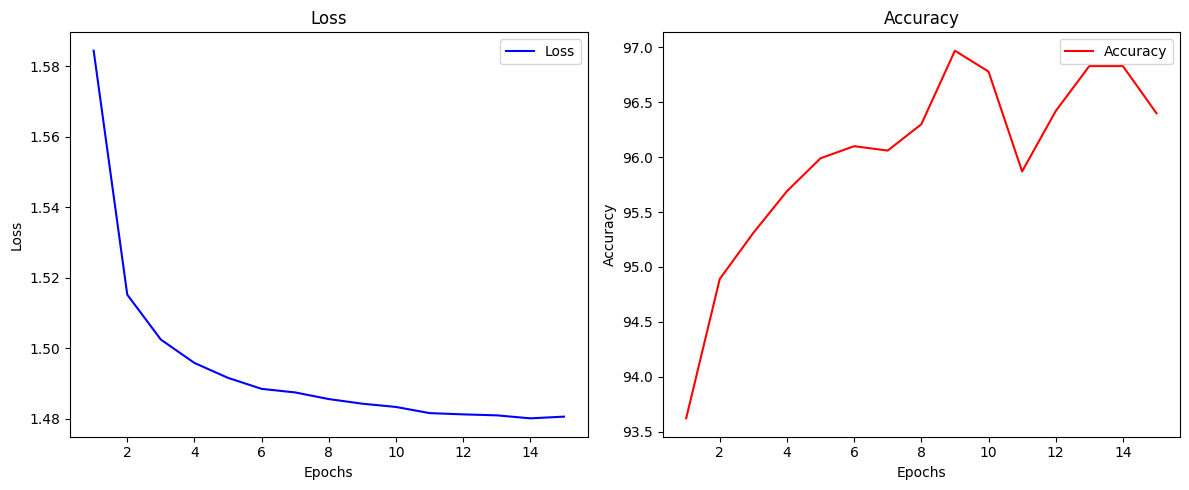

In [ ]:
plot_loss_and_accuracy(loss, accu)